In [1]:
from appgeopy import *
from my_packages import *

In [2]:
# filepath = r"D:\1000_SCRIPTS\002_Manuscript_1\14_POST-PROCESSING\Figures\AverageVelocity_GPS_InSAR\AverageVelocity_GPS_InSAR_1.xlsx"
filepath = r"D:\1000_SCRIPTS\002_Manuscript_1\17_VERTICAL\All_InSAR_Leveling_Comparison.xlsx"
folder2savefigure = os.getcwd()
df = pd.read_excel(filepath)
# df = df.sort_values(by="STATION")
df.head(5)

,CODE,PLACE,X_TWD97,Y_TWD97,LEV_AvgVel,PSC_AvgVel,PSC_count,AbsError
0,BMNO03,Changhua,204013.0,2646309.0,-8.349938,-6.943659,303,1.406279
1,SAS1+200,Changhua,189742.0,2662101.0,-4.612339,-2.505828,65,2.106511
2,SAS1+300,Changhua,189728.0,2662003.0,-3.717904,-3.592553,63,0.125352
3,SAS1+750,Changhua,189707.0,2661560.0,-3.473184,-2.759745,104,0.713439
4,YA0+000,Changhua,191805.0,2664518.0,-2.927005,3.005446,81,5.932451


In [13]:
base = f"Leveling_InSAR_VERT_Calibrated"
figSave = True

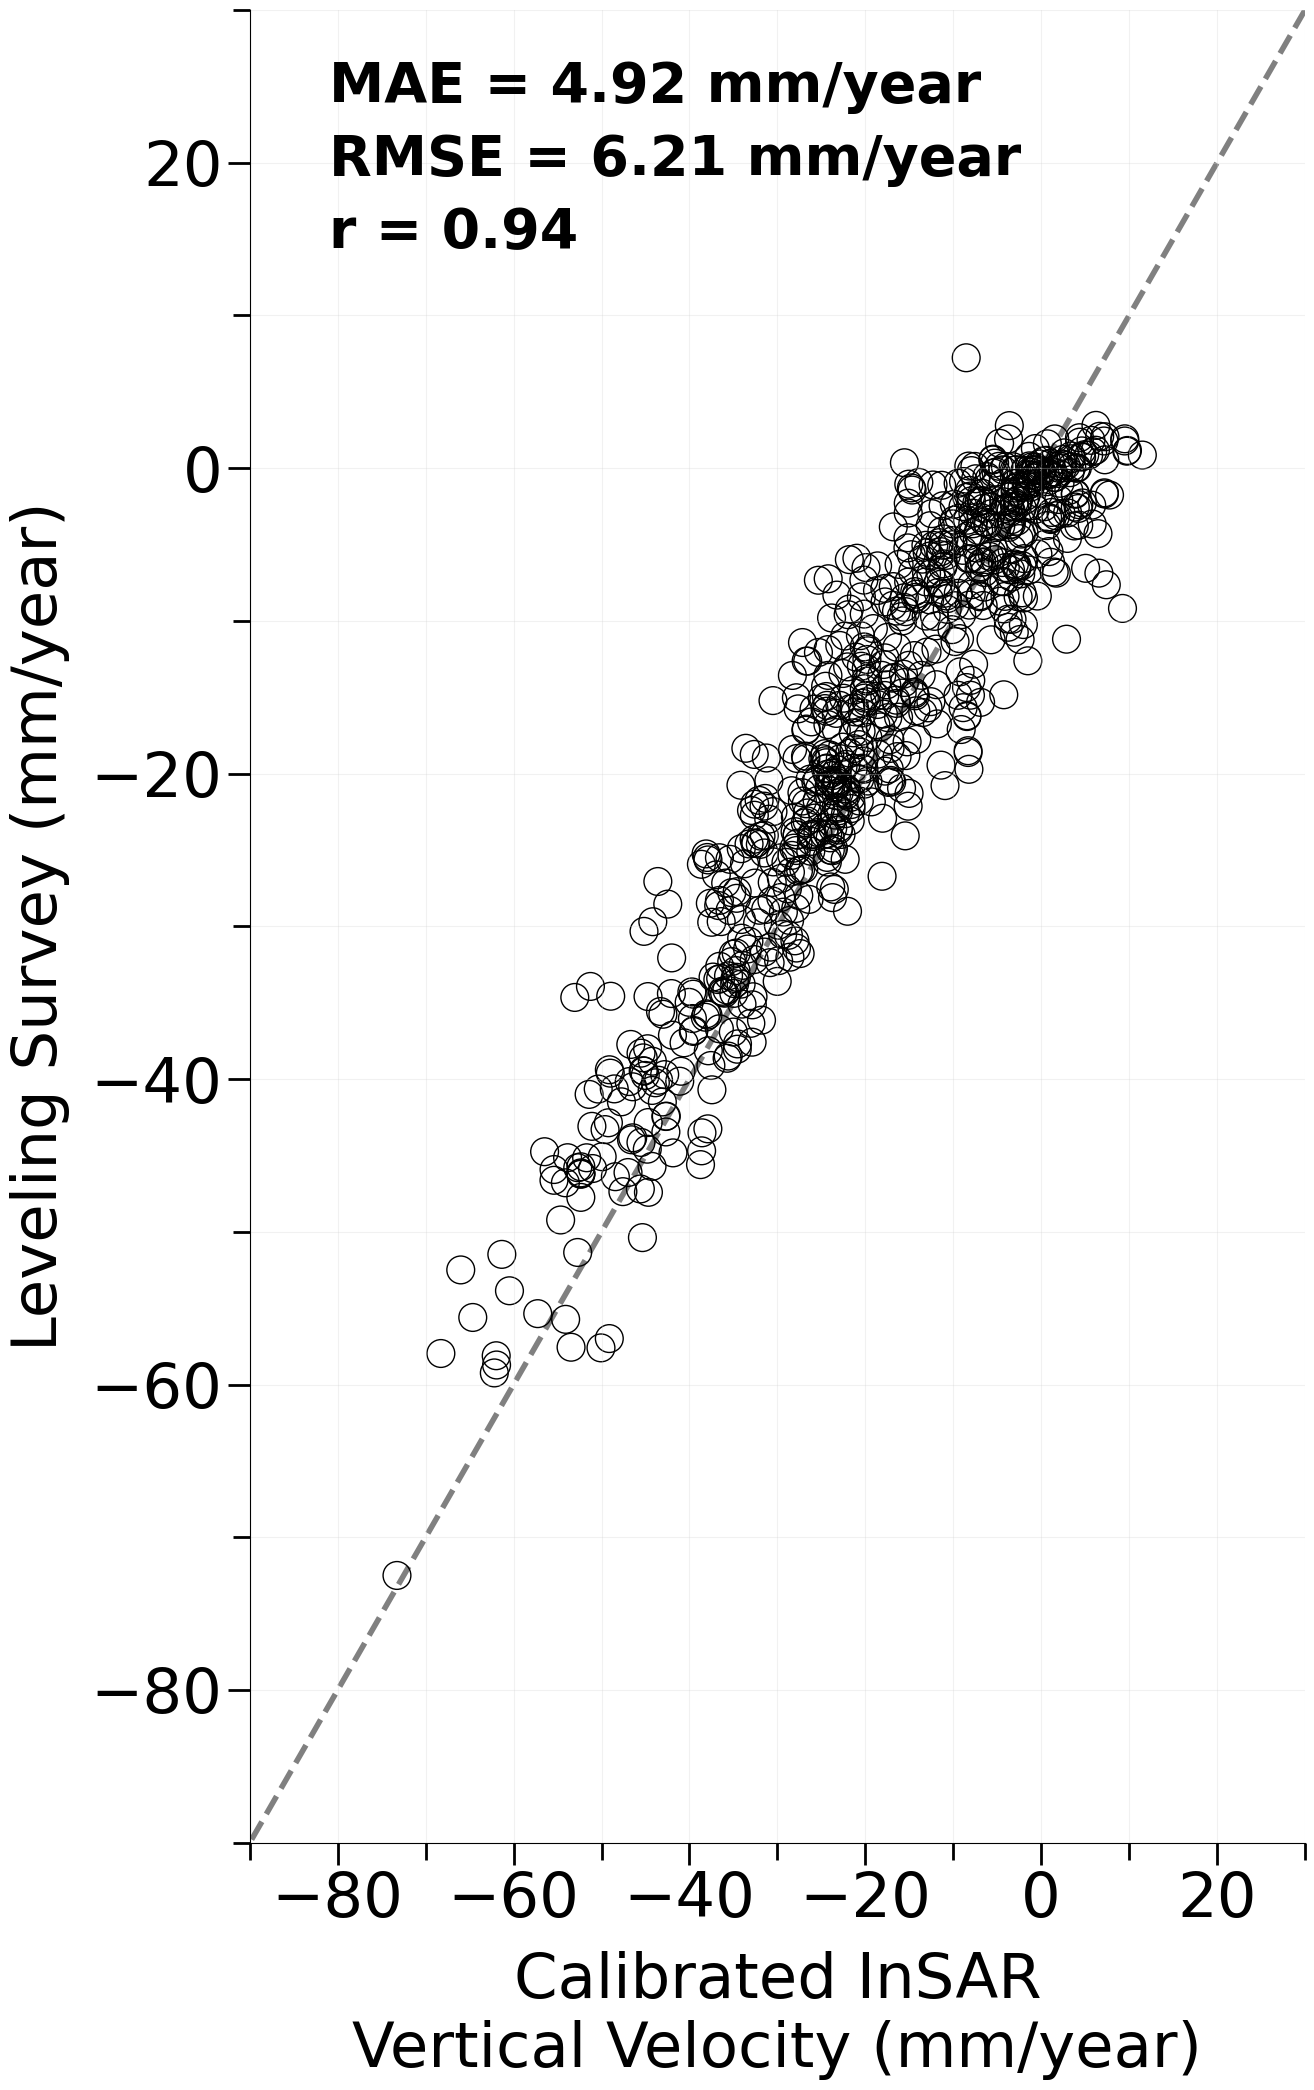

In [14]:
cm = 1 / 2.54
multiplier = 2.5
fig = plt.figure(figsize=(5.3*multiplier, 8.4*multiplier))
ax = fig.add_subplot(1, 1, 1)
ax.grid(axis="both", which="both", color="lightgrey", alpha=0.3)
top_thres = 30
bot_thres = -90

x1, y1 = [top_thres, bot_thres], [top_thres, bot_thres]
ax.plot(x1, y1, linestyle="--", color="gray", linewidth=4, zorder=1)

ax.set_xlim(bot_thres, top_thres)
ax.set_ylim(bot_thres, top_thres)

# ax.set_aspect(aspect="equal", adjustable="box")

x_axis_object = "PSC_AvgVel"
x_axis_label = "Calibrated InSAR\nVertical Velocity (mm/year)"

y_axis_object = "LEV_AvgVel"
y_axis_label = "Leveling Survey (mm/year)"

df["ABS"] = abs(df[x_axis_object] - df[y_axis_object])
df = df.query("ABS<=20")

# df3 = df[df['STATION'].isin(df2['STATION'])]

# scatter_points = [(psc, lev) for psc, lev in zip(df["GPS(mm/y)"], df["InSAR(mm/y)"])]
scatter_points = [(psc, lev) for psc, lev in zip(df[x_axis_object], df[y_axis_object])]
# scatter_points_2 = [(psc, lev) for psc, lev in zip(df3[x_axis_object], df3[y_axis_object])]

scatter_plot = ax.scatter(*zip(*scatter_points), s=400, facecolors="none", edgecolors="black", marker="o")
# scatter_plot2 = ax.scatter(*zip(*scatter_points_2), s=400, facecolors="none", edgecolors="deepskyblue", marker="o", linewidth=1.5)

# Creating a scatter plot using Seaborn for added color and styling
# sns.scatterplot(
#     data=df,
#     x="GPS(mm/year)",
#     y="Leveling(mm/year)",
#     hue="STATION",
#     palette="tab20",
#     s=400,
#     edgecolor="black",
#     zorder=2,
#     ax=ax,
# )


# x = df["GPS(mm/y)"]
# y = df["InSAR(mm/y)"]

x = df[x_axis_object]
y = df[y_axis_object]

ax.set_xlabel(x_axis_label, fontsize=45, labelpad=15)
ax.set_ylabel(y_axis_label, fontsize=45, labelpad=15)

mean_abs_err = np.mean(np.abs(x - y))
rmse = np.sqrt(np.mean((x - y) ** 2))
m, c, r, p, se1 = stats.linregress(x, y)

major_base = 20
minor_base = 10

x_major_loc = plticker.MultipleLocator(base=major_base)
x_minor_loc = plticker.MultipleLocator(base=minor_base)
ax.xaxis.set_major_locator(x_major_loc)
ax.xaxis.set_minor_locator(x_minor_loc)

y_major_loc = plticker.MultipleLocator(base=major_base)
y_minor_loc = plticker.MultipleLocator(base=minor_base)
ax.yaxis.set_major_locator(y_major_loc)
ax.yaxis.set_minor_locator(y_minor_loc)

ax.tick_params(axis="y", which="major", labelsize=45, direction="out", length=16, width=2)
ax.tick_params(axis="y", which="minor", labelsize=45, direction="out", length=12, width=2)

ax.tick_params(axis="x", which="major", labelsize=45, direction="out", length=16, width=2)
ax.tick_params(axis="x", which="minor", labelsize=45, direction="out", length=12, width=2)

ax.text(
    0.075,
    0.95,
    f"MAE = {mean_abs_err:.2f} mm/year",
    transform=plt.gca().transAxes,
    fontweight="bold",
    fontsize=40,
)
ax.text(
    0.075,
    0.91,
    f"RMSE = {rmse:.2f} mm/year",
    transform=plt.gca().transAxes,
    fontweight="bold",
    fontsize=40,
)

ax.text(
    0.075,
    0.87,
    f"r = {r:.2f}",
    transform=plt.gca().transAxes,
    fontweight="bold",
    fontsize=40,
)

ax.spines[["right", "top"]].set_visible(False)

# ax.legend(
#     fontsize=24,
#     frameon=True,
#     labelspacing=0.1,
#     handletextpad=0.2,
#     loc='lower right',
#     markerscale=2,
# )

fig.tight_layout()


for i in range(1, 1001):
    savename = os.path.join(folder2savefigure, base + "_{}.png".format(str(i).zfill(3)))
    if os.path.exists(savename):
        continue
    else:
        break

if figSave:
    plt.savefig(
        savename,
        dpi=600,
        transparent=False,
        facecolor="w",
        edgecolor="w",
        bbox_inches="tight",
    )
# plt.close()
plt.show()